# Table of Contents
- [Introduction](#introduction)
- [Methodology](#methodology)
  - [Data Collection](#data-collection)
  - [Data Analysis](#data-analysis)
- [Conclusion](#conclusion)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm                        # type: ignore

## Data Collection 


In [ ]:
# function to read txt data files and convert them to proper csv files
# txtFile: input filename (including directory if applicable)
# csvFile: output filename (including directory if applicable)
# vtabchar: vertical tab character in the original file (to be replaced with newline command '\n')
# delim: delimiter character used in the original file (to be replaced with comma)
def txt2csv(txtFile, csvFile, vtabchar, delim):
    with open(txtFile, 'r') as file:
        data = file.read().replace(vtabchar, '\n').replace(delim, ',')
    with open(csvFile, 'w') as file:
        file.write(data)    
    return

Set the filename and location for each dataset

In [ ]:
# original filename and directory for txt data files
K1DI2_txt = './Data/Komponente/Komponente_K1DI2.txt'
K2LE1_txt = './Data/Komponente/Komponente_K2LE1.txt' 
K2LE2_txt = './Data/Komponente/Komponente_K2LE2.txt'
K2ST1_txt = './Data/Komponente/Komponente_K2ST1.txt'
K3AG2_txt = './Data/Komponente/Komponente_K3AG2.txt'
K7_txt    = './Data/Komponente/Komponente_K7.txt'

# converted txt filename and directory
K1DI2_csv = './Data/Komponente/Komponente_K1DI2.csv'
K2LE1_csv = './Data/Komponente/Komponente_K2LE1.csv'
K2LE2_csv = './Data/Komponente/Komponente_K2LE2.csv'
K2ST1_csv = './Data/Komponente/Komponente_K2ST1.csv'
K3AG2_csv = './Data/Komponente/Komponente_K3AG2.csv'
K7_csv    = './Data/Komponente/Komponente_K7.csv'

# original filename and directory for csv data files
# component data files
K1BE1_csv = './Data/Komponente/Komponente_K1BE1.csv'
K1BE2_csv = './Data/Komponente/Komponente_K1BE2.csv'
K1DI1_csv = './Data/Komponente/Komponente_K1DI1.csv'
K2ST2_csv = './Data/Komponente/Komponente_K2ST2.csv'
K3AG1_csv = './Data/Komponente/Komponente_K3AG1.csv'
K3SG1_csv = './Data/Komponente/Komponente_K3SG1.csv'
K3SG2_csv = './Data/Komponente/Komponente_K3SG2.csv'
K4_csv    = './Data/Komponente/Komponente_K4.csv'
K5_csv    = './Data/Komponente/Komponente_K5.csv'
K6_csv    = './Data/Komponente/Komponente_K6.csv'    

In [ ]:
# read and convert all the txt data files to csv
txt2csv(K1DI2_txt, K1DI2_csv, '	', '\\')
txt2csv(K2LE1_txt, K2LE1_csv, '', 'II')
txt2csv(K2LE2_txt, K2LE2_csv, '', '\\')
txt2csv(K2ST1_txt, K2ST1_csv, '', '|')
txt2csv(K3AG2_txt, K3AG2_csv, '', '\\')
txt2csv(K7_txt   , K7_csv   , '', '	')

In [ ]:
# separate the data arrangements into 4 types, namely A, B, C, and D. 
# this separation is based on the column names of the datetime data type
A = ['Fehlerhaft_Datum', 'origin']
B = ['Produktionsdatum.x', 'Fehlerhaft_Datum.x', 
     'Produktionsdatum.y', 'Fehlerhaft_Datum.y']
C = ['Produktionsdatum.x', 'Fehlerhaft_Datum.x', 
     'Produktionsdatum.y', 'Fehlerhaft_Datum.y', 
     'Produktionsdatum', 'Fehlerhaft_Datum']
D = ['Produktionsdatum', 'Fehlerhaft_Datum']

# set up a function to read the csv files
def csvReader(csvFile, arr_type, delim=None):
    if delim is not None:
        dataset = pd.read_csv(csvFile, parse_dates=arr_type, 
                          low_memory=False, sep=delim)
    else:
        dataset = pd.read_csv(csvFile, parse_dates=arr_type, 
                          low_memory=False)
    return dataset

# read the converted csv files using the csvReader function
K1DI2 = csvReader(K1DI2_csv, A)
K2LE1 = csvReader(K2LE1_csv, B)
K2LE2 = csvReader(K2LE2_csv, A)
K2ST1 = csvReader(K2ST1_csv, D)
K3AG2 = csvReader(K3AG2_csv, A)
K7    = csvReader(K7_csv, A)

# read the rest of the csv files using the csvReader function
K1BE1 = csvReader(K1BE1_csv, A)
K1BE2 = csvReader(K1BE2_csv, A, ';')
K1DI1 = csvReader(K1DI1_csv, C)
K2ST2 = csvReader(K2ST2_csv, A, ';')
K3AG1 = csvReader(K3AG1_csv, C)
K3SG1 = csvReader(K3SG1_csv, B)
K3SG2 = csvReader(K3SG2_csv, A)
K4    = csvReader(K4_csv,    B, ';')
K5    = csvReader(K5_csv,    B)
K6    = csvReader(K6_csv,    A, ';')

For datasets with data arrangements of type B and C, we need to consolidate the columns and eliminate the .x and .y suffixes. For type B, the tables are separated into 2, whereas for type C, the tables are separated into 3.

In [ ]:
# column names to be renamed for type B
col_names_x = {'Produktionsdatum.x':'Produktionsdatum', 
               'Herstellernummer.x':'Herstellernummer',	
               'Werksnummer.x':'Werksnummer',
               'Fehlerhaft.x':'Fehlerhaft', 
               'Fehlerhaft_Datum.x':'Fehlerhaft_Datum',
               'Fehlerhaft_Fahrleistung.x':'Fehlerhaft_Fahrleistung'}
col_names_y = {'Produktionsdatum.y':'Produktionsdatum', 
               'Herstellernummer.y':'Herstellernummer',	
               'Werksnummer.y':'Werksnummer',
               'Fehlerhaft.y':'Fehlerhaft', 
               'Fehlerhaft_Datum.y':'Fehlerhaft_Datum',
               'Fehlerhaft_Fahrleistung.y':'Fehlerhaft_Fahrleistung'}

# set up variables for the components. The components are engine (Motor), electrical components (Schaltung),
# body components (Karosserie), and seats (Sitze)
idMotor  = 'ID_Motor'        ; idSchalt  = 'ID_Schaltung'
idMotorx = 'ID_Motor.x'      ; idSchaltx = 'ID_Schaltung.x'
idMotory = 'ID_Motor.y'      ; idSchalty = 'ID_Schaltung.y'

idKaros  = 'ID_Karosserie'   ; idSitze  = 'ID_Sitze'
idKarosx = 'ID_Karosserie.x' ; idSitzex = 'ID_Sitze.x' 
idKarosy = 'ID_Karosserie.y' ; idSitzey = 'ID_Sitze.y'

# separate type B tables based on the suffixes, rename the columns, and 
# concatenate vertically, and finally extract the columns that contain the data.
# the cleaned up dataset is added with suffix '_c'
def streamlineTypeB(dataset, colx, coly, ID, IDx, IDy):
    dataset_x = dataset[dataset[IDx].notna()].rename(columns=colx)
    dataset_y = dataset[dataset[IDy].notna()].rename(columns=coly)
    dataset_x = dataset_x.rename(columns={IDx : ID})
    dataset_y = dataset_y.rename(columns={IDy : ID})
    dataset_x = dataset_x.loc[:, ID:'Fehlerhaft_Fahrleistung']
    dataset_y = dataset_y.loc[:, ID:'Fehlerhaft_Fahrleistung']
    dataset_c = pd.concat([dataset_x, dataset_y], axis=0).reset_index(drop=True)
    return dataset_c

K2LE1_c = streamlineTypeB(K2LE1, col_names_x, col_names_y, 
                            idSitze, idSitzex, idSitzey)
K3SG1_c = streamlineTypeB(K3SG1, col_names_x, col_names_y, 
                            idSchalt, idSchaltx, idSchalty)
K4_c    = streamlineTypeB(K4, col_names_x, col_names_y, 
                            idKaros, idKarosx, idKarosy)
K5_c    = streamlineTypeB(K5, col_names_x, col_names_y, 
                            idKaros, idKarosx, idKarosy)

# separate type C tables based on the suffixes, rename the columns, and 
# concatenate vertically, and finally extract the columns that contain the data.
# the cleaned up dataset is added with suffix '_c'
def streamlineTypeC(dataset, colx, coly, ID, IDx, IDy):
    dataset_x = dataset[dataset[IDx].notna()].loc[:, IDx:'Fehlerhaft_Fahrleistung.x'].rename(columns=colx)
    dataset_y = dataset[dataset[IDy].notna()].loc[:, IDy:'Fehlerhaft_Fahrleistung.y'].rename(columns=coly)
    dataset_  = dataset[dataset[ID].notna()]
    dataset_x = dataset_x.rename(columns={IDx : ID})
    dataset_y = dataset_y.rename(columns={IDy : ID})
    dataset_  = dataset_.loc[:, ID:'Fehlerhaft_Fahrleistung']    
    dataset_c = pd.concat([dataset_x, dataset_y, dataset_], axis=0).reset_index(drop=True)
    return dataset_c

K1DI1_c = streamlineTypeC(K1DI1, col_names_x, col_names_y,
                          idMotor, idMotorx, idMotory)
K3AG1_c = streamlineTypeC(K3AG1, col_names_x, col_names_y,
                          idSchalt, idSchaltx, idSchalty)
K2ST1_c = K2ST1.loc[:, idSitze:'Fehlerhaft_Fahrleistung']

In [ ]:
def addProduktionsDatum(dataset):
    dataset['Produktionsdatum'] = dataset['origin'] + pd.to_timedelta(dataset['Produktionsdatum_Origin_01011970'].astype('int'), unit='days')
    return dataset

def reformatDataset(dataset, ID):
    dataset_c = pd.concat([dataset.loc[:,ID], 
                           dataset.loc[:,'Produktionsdatum'], 
                           dataset.loc[:,'Herstellernummer':'Fehlerhaft_Fahrleistung']], axis=1)
    return dataset_c

K1BE1_c = reformatDataset(addProduktionsDatum(K1BE1), idMotor)
K1BE2_c = reformatDataset(addProduktionsDatum(K1BE2), idMotor)
K1DI2_c = reformatDataset(addProduktionsDatum(K1DI2), idMotor)
K2LE2_c = reformatDataset(addProduktionsDatum(K2LE2), idSitze)
K2ST2_c = reformatDataset(addProduktionsDatum(K2ST2), idSitze)
K3AG2_c = reformatDataset(addProduktionsDatum(K3AG2), idSchalt)
K3SG2_c = reformatDataset(addProduktionsDatum(K3SG2), idSchalt)
K6_c    = reformatDataset(addProduktionsDatum(K6), idKaros)
K7_c    = reformatDataset(addProduktionsDatum(K7), idKaros)

# classify the components into list based on the types of components (Motor, Sitze, Schaltung, and Karosserie)
motorList      = [K1BE1_c, K1BE2_c, K1DI1_c, K1DI2_c]
sitzeList      = [K2LE1_c, K2LE2_c, K2ST1_c, K2ST2_c]
schaltungList  = [K3AG1_c, K3AG2_c, K3SG1_c, K3SG2_c]
karosserieList = [K4_c, K5_c, K6_c, K7_c]

motorName      = ['K1BE1', 'K1BE2', 'K1DI1', 'K1DI2']
sitzeName      = ['K2LE1', 'K2LE2', 'K2ST1', 'K2ST2']
schaltungName  = ['K3AG1', 'K3AG2', 'K3SG1', 'K3SG2']
karosserieName = ['K4', 'K5', 'K6', 'K7']

# checks for duplicates in the components datalists and drop them if preset
def dropDuplicates(datasetList):
    for i in range(len(datasetList)):
        datasetList[i] = datasetList[i].drop_duplicates()
        datasetList[i] = datasetList[i].reset_index(drop=True)
    return datasetList

motorList      = dropDuplicates(motorList)
sitzeList      = dropDuplicates(sitzeList)
schaltungList  = dropDuplicates(schaltungList)
karosserieList = dropDuplicates(karosserieList)


Now, we create the cleaned dataset that contains all the components information for components produced during the analysis period. The columns consist component type, part number, date of production, supplier number, plant number, failure status, date of failure, and failure mileage. First, we concatenate all the components of the same type and then concatenate all the components together.

In [11]:
# create a function to concatenate the datasets of each component type, merge the component dataset with the vehicle dataset,
# and rename the ID columns of all the dataset.
def concatenateDataset(datasetList, id):
    for i in (1, len(datasetList) - 1):
        datasetList_all = pd.concat([datasetList[0], datasetList[i]], axis=0)
        datasetList[0]  = datasetList_all
    datasetList_all = datasetList_all.rename(columns={id:'ID'})
    return datasetList_all

# concatenate the components based on type
motorList_all      = concatenateDataset(motorList, idMotor)
sitzeList_all      = concatenateDataset(sitzeList, idSitze)
schaltungList_all  = concatenateDataset(schaltungList, idSchalt)
karosserieList_all = concatenateDataset(karosserieList, idKaros)

# concatenate all the components into a single dataset
komponente_all = pd.concat([motorList_all,
                                          sitzeList_all,
                                          schaltungList_all,
                                          karosserieList_all], axis=0, join='inner')

# set the Herstellernummer, Werksnummer, and Fehlerhaft columns as int
int_col = ['Herstellernummer','Werksnummer','Fehlerhaft']
komponente_all[int_col] = komponente_all[int_col].astype('int')

# save the cleaned file to the final dataset
komponente_all.to_csv('Final_dataset_group_33.csv')

The case study requirements are as the following:
1. Relative defects for components supplied by each plants
2. Find out the product groups where defects are dominant
3. Decide if product group inspection or comprehensive inspection is necessary

We start with the first requirement: Relative defects for components supplied by each plants. 

First, we list the plants, calculate the annual volumes, calculate the defective components' annual volumes produced by the plants, and calculate its relative frequency.

In [12]:
# find the number of plants that produce the components and 
# make a list of plants
plantList = komponente_all['Werksnummer'].unique()

# set the production year
productionYear = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [13]:
plantProd  = []
for year in productionYear:
    for plant in plantList:
        totalVolume  = komponente_all.loc[
                                (komponente_all['Werksnummer'] == plant)
                              & (komponente_all['Produktionsdatum'].dt.year == year)].shape[0]
        defectVolume = komponente_all[
                                (komponente_all['Werksnummer'] == plant)
                              & (komponente_all['Produktionsdatum'].dt.year == year)
                              & (komponente_all['Fehlerhaft'] == 1)].shape[0]
        if (totalVolume != 0) & (defectVolume != 0):
            relativeFreq = defectVolume / totalVolume
            relativeFreqPercentage = relativeFreq * 100
        else: 
            relativeFreq = 0
            relativeFreqPercentage = 0
        plantProd.append([year, plant, totalVolume, defectVolume, 
                          relativeFreq, relativeFreqPercentage])

plantList_relFrq = pd.DataFrame(plantProd,
                                columns=['year', 'werksnummer', 
                                         'totalVolume', 'defectVolume', 
                                         'relativeFreq', 'relativeFreqPercentage'])

In [14]:
# distribute the annual volumentric relative frequency dataset to its respective 
# plant name
def distributePlantStat(plant, plantList_relFrq, plantList):
        for i in range(len(plantList)):
                plant.append(plantList_relFrq[plantList_relFrq['werksnummer'] 
                                              == plantList[i]])
        # plant = plant.reset_index(drop=True)
        return plant
plant = []
plant = distributePlantStat(plant, plantList_relFrq, plantList)

# filter the plant tables to remove the rows where the total volumes and 
# defective volumes are zero
for i in range(len(plant)):
        plant[i] = plant[i][(plant[i]['totalVolume'] != 0) 
                            & (plant[i]['totalVolume'] != 0)]

# for reference, the plant list assignment is as the following:
# plant1011 = plant[0];  plant1041 = plant[1];  plant1021 = plant[2]; 
# plant1031 = plant[3];  plant1091 = plant[4];  plant1111 = plant[5]; 
# plant1092 = plant[6];  plant1101 = plant[7];  plant1051 = plant[8]; 
# plant1061 = plant[9];  plant1082 = plant[10]; plant1081 = plant[11]; 
# plant1072 = plant[12]; plant1121 = plant[13]; plant1141 = plant[14]; 
# plant1122 = plant[15]; plant1131 = plant[16]; plant1142 = plant[17]; 
# plant1132 = plant[18]

Create an overall line chart that shows relative frequency plot for all the plants

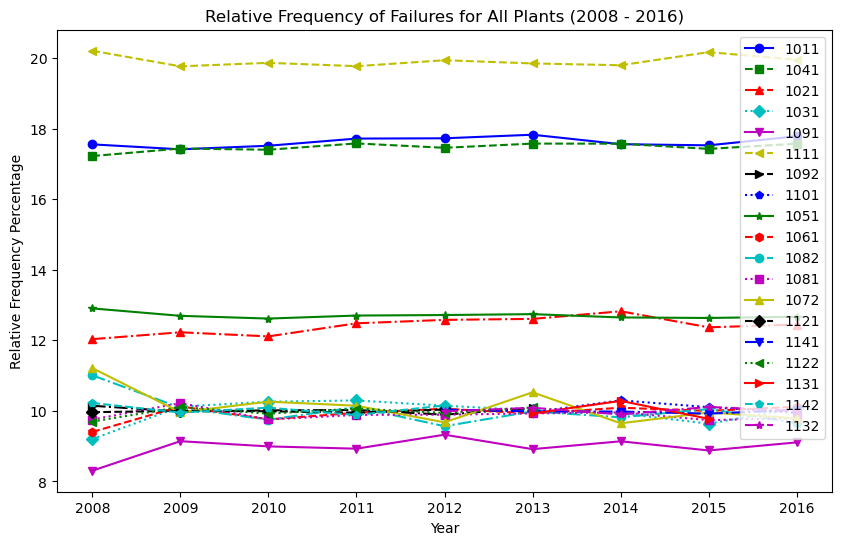

In [15]:
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h',
           'o', 's', '^', 'D', 'v', '<', '>', 'p', '*']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 
          'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm']
lineStyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', 
              '-', '--', '-.', ':', '-', '--', '-.', ':',
              '-', '--', '-.']

plt.figure(figsize=(10,6))
for i in range(len(plant)):
    plt.plot(plant[i]['year'], plant[i]['relativeFreqPercentage'],
             marker=markers[i], linestyle=lineStyles[i], color=colors[i], label=str(plant[i]))
plt.legend(plantList, loc='best')
plt.xlabel('Year')
plt.ylabel('Relative Frequency Percentage')
plt.title('Relative Frequency of Failures for All Plants (2008 - 2016)')
plt.show()

Now, we create an individual relative frequency of failure for each plant. First we calculate the parameters required to create P-Chart: 
- Proportion Defective (relative frequency) or p
- Upper Control Limit (UCL)
- Lower Control Limit (LCL)

In [16]:
def pChartCalculation(plantNo):
    plantControlLimit        = pd.DataFrame(columns=['p','ucl','lcl'])
    plantControlLimit['p']   = plantNo['relativeFreq']
    pBar                     = plantControlLimit['p'].mean()
    for i in plantControlLimit.index:
        plantControlLimit['ucl'] = pBar + 3 * np.sqrt((pBar * (1 - pBar)) 
                                        / plantNo['totalVolume'])
        plantControlLimit['lcl'] = pBar - 3 * np.sqrt((pBar * (1 - pBar)) 
                                        / plantNo['totalVolume'])
        if plantControlLimit['lcl'][i] < 0:
            plantControlLimit['lcl'][i] = 0
    return plantControlLimit

plantControlLimit = []
for i in range(len(plant)):
    plantControlLimit.append(pChartCalculation(plant[i]))

Create a P-Chart for the relative frequency

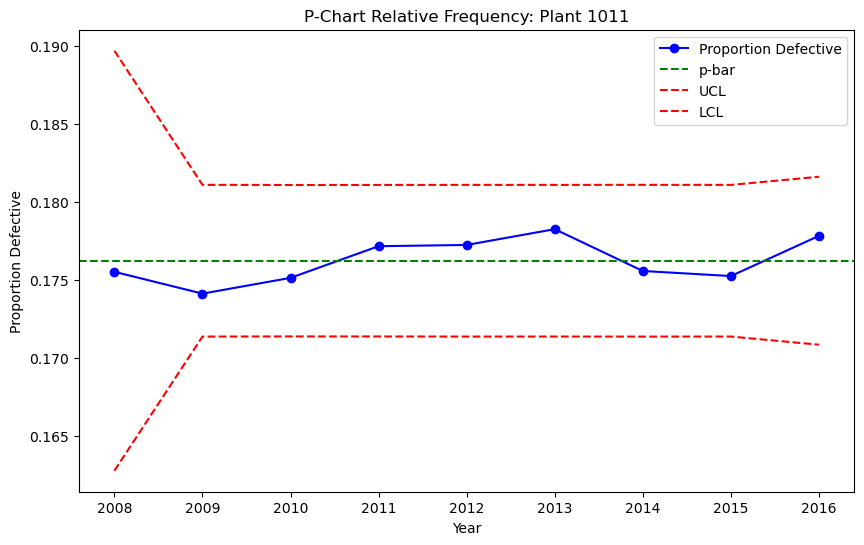

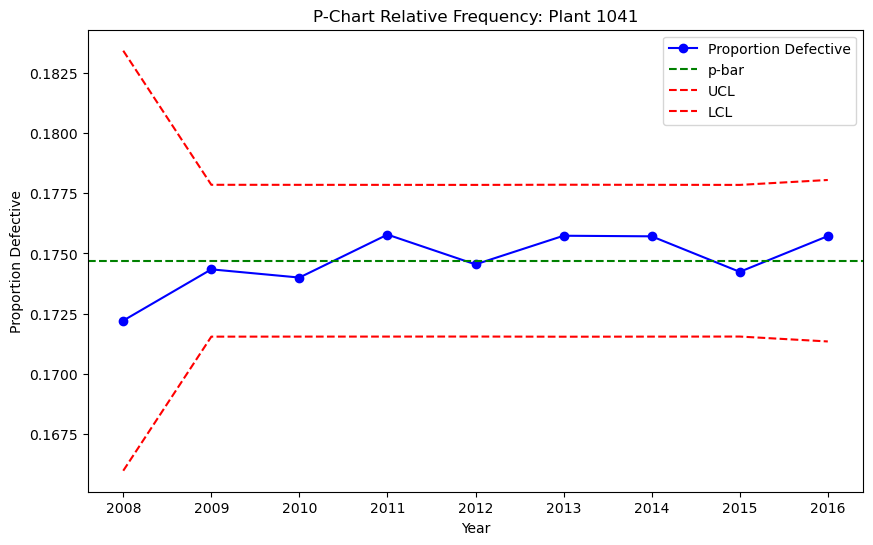

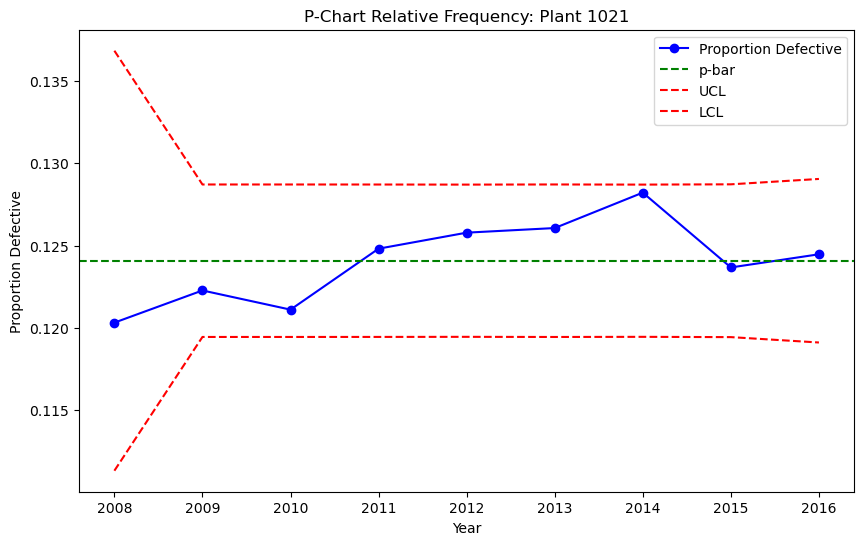

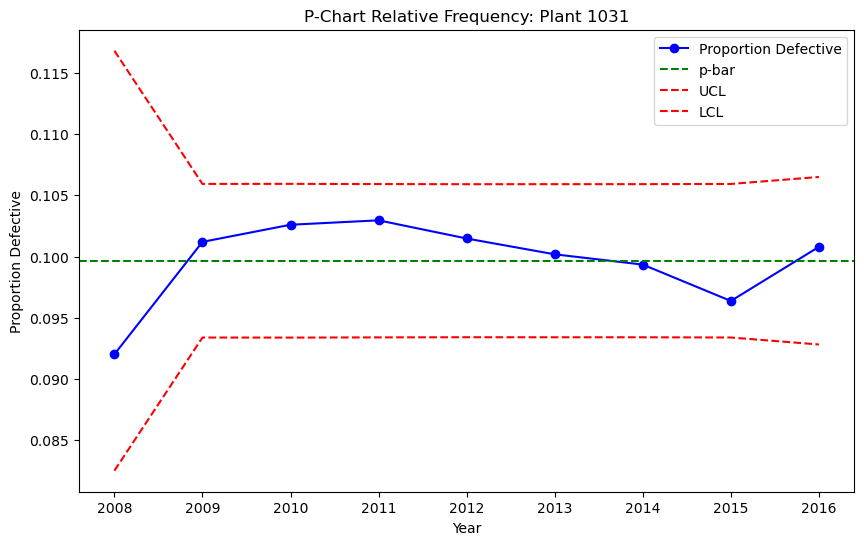

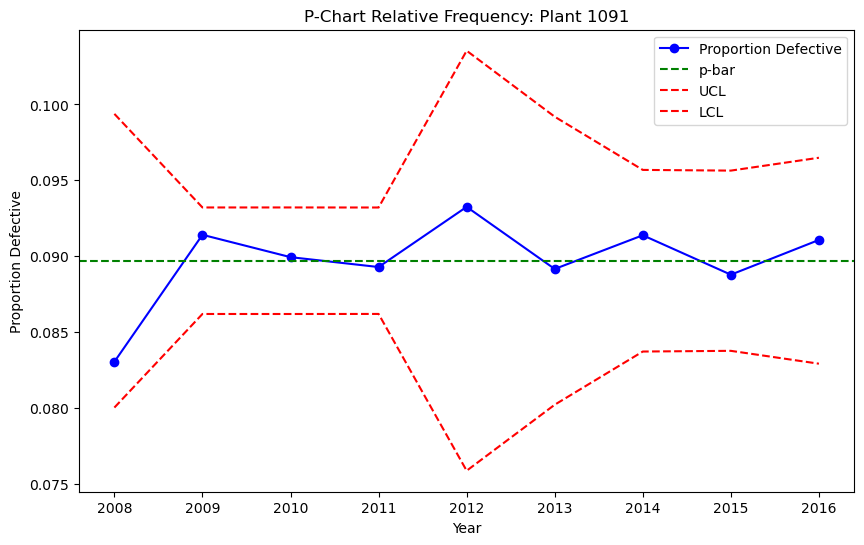

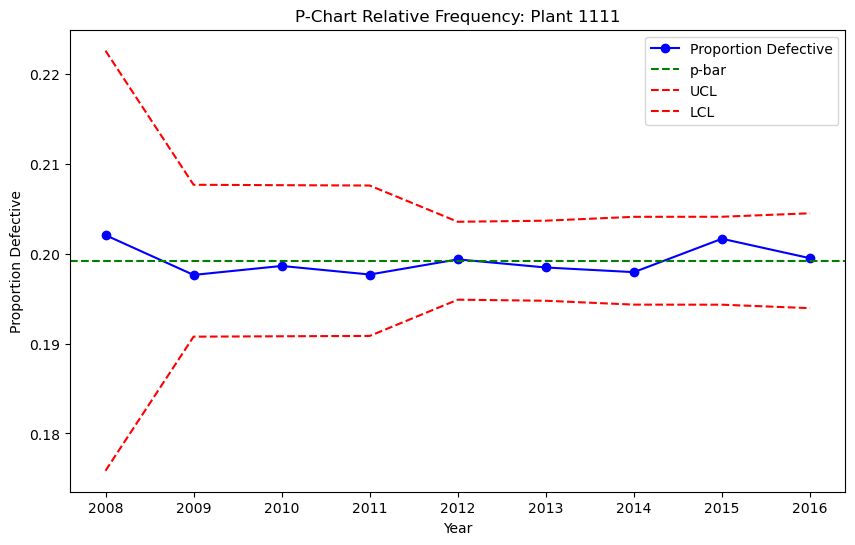

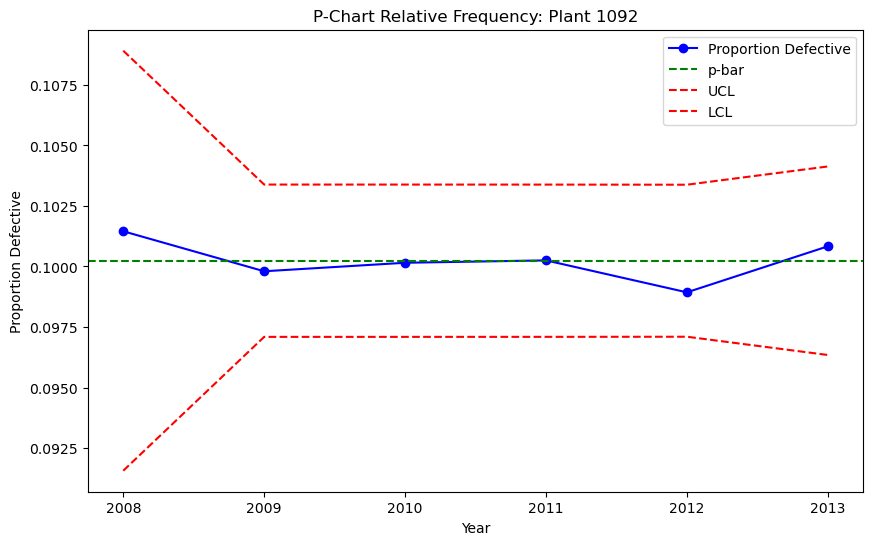

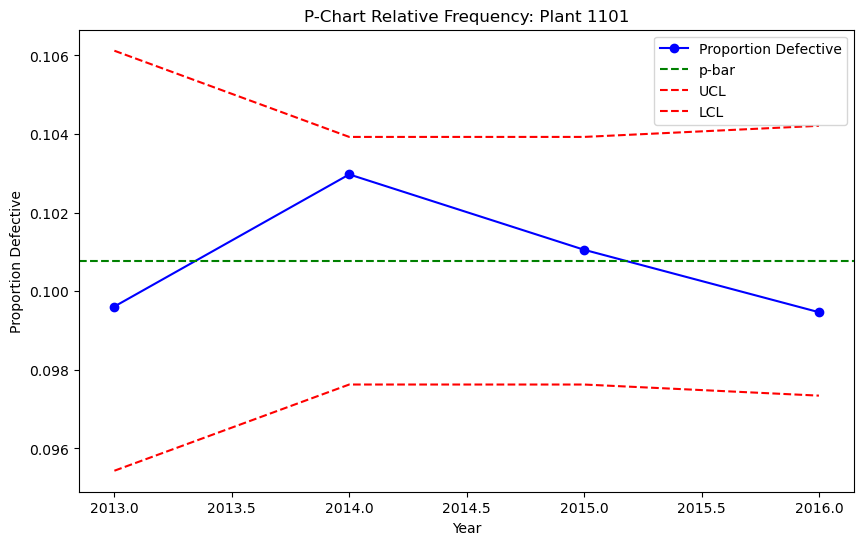

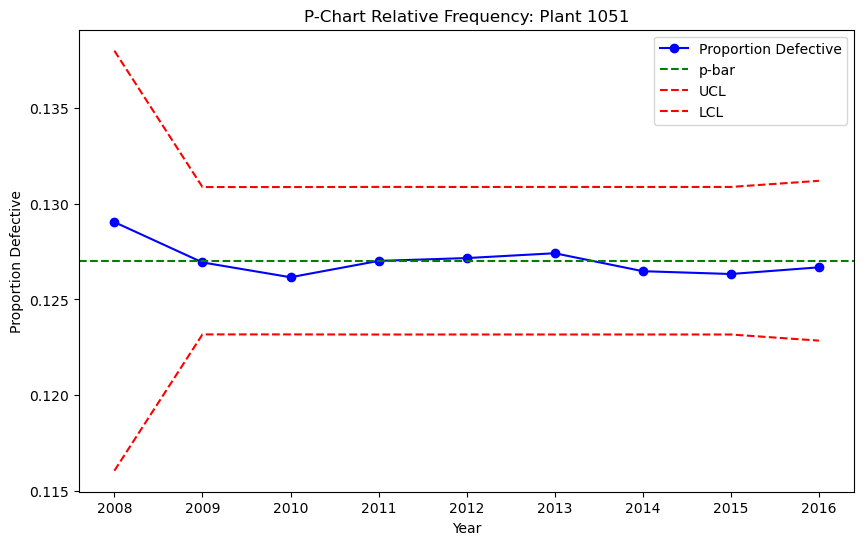

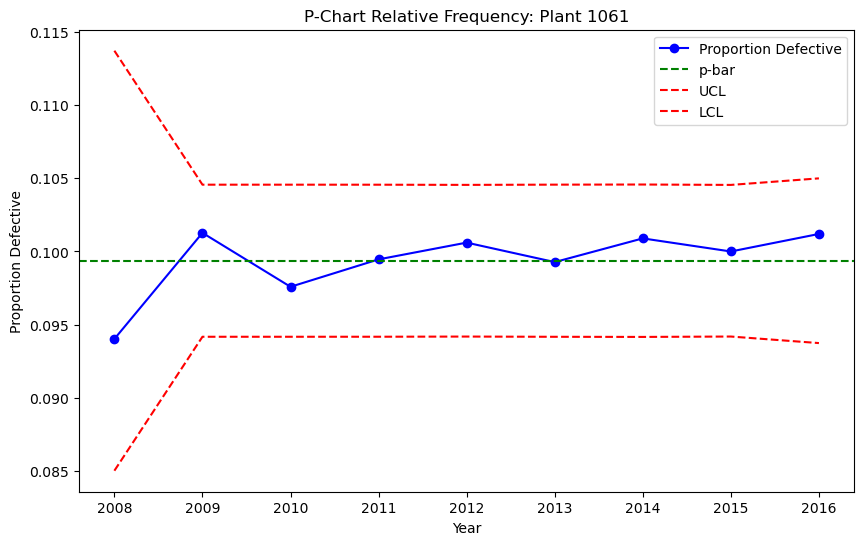

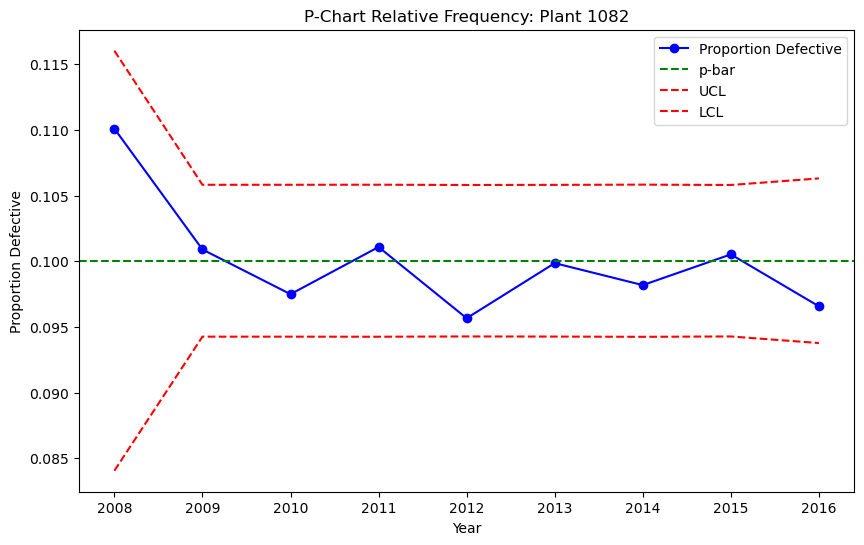

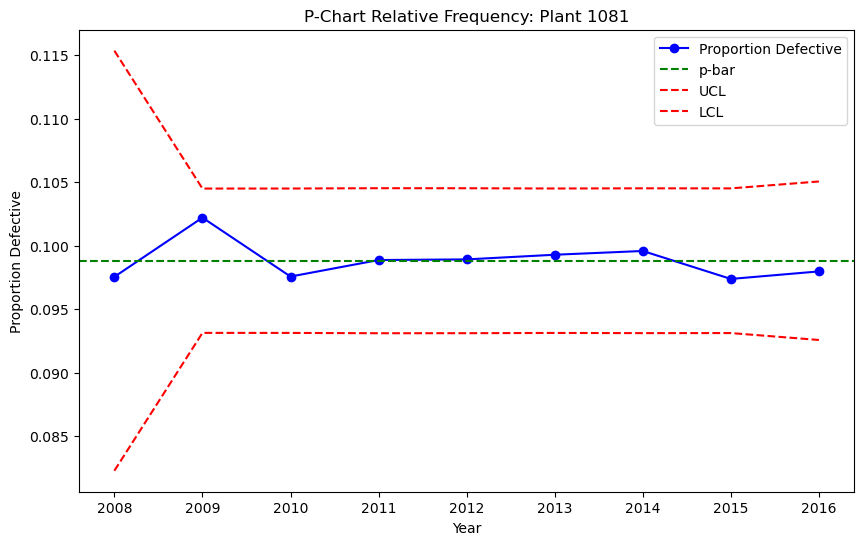

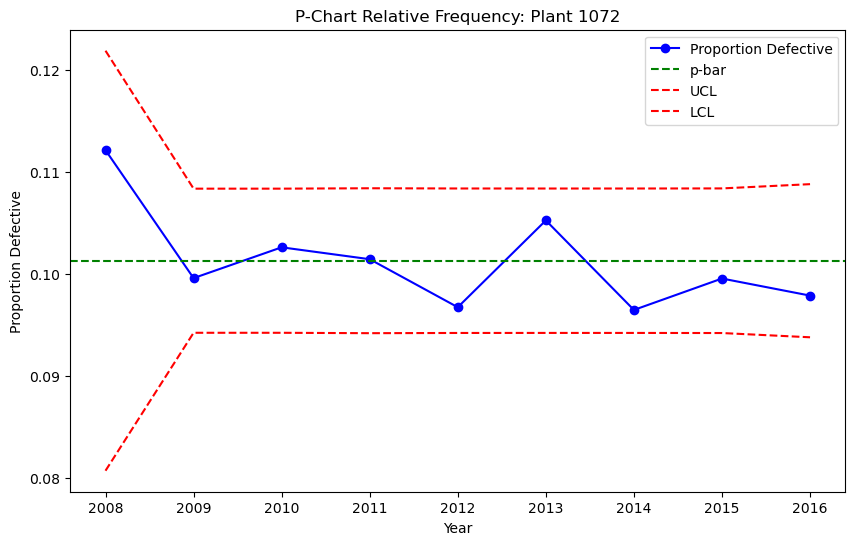

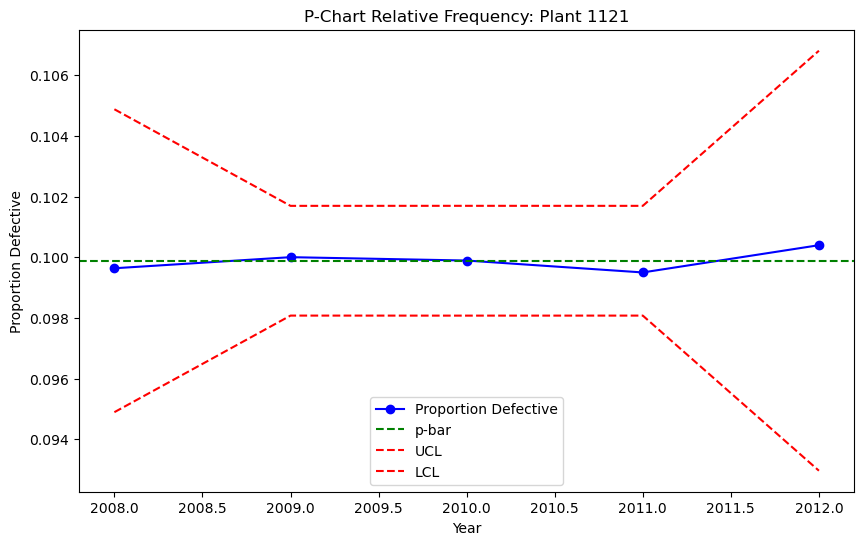

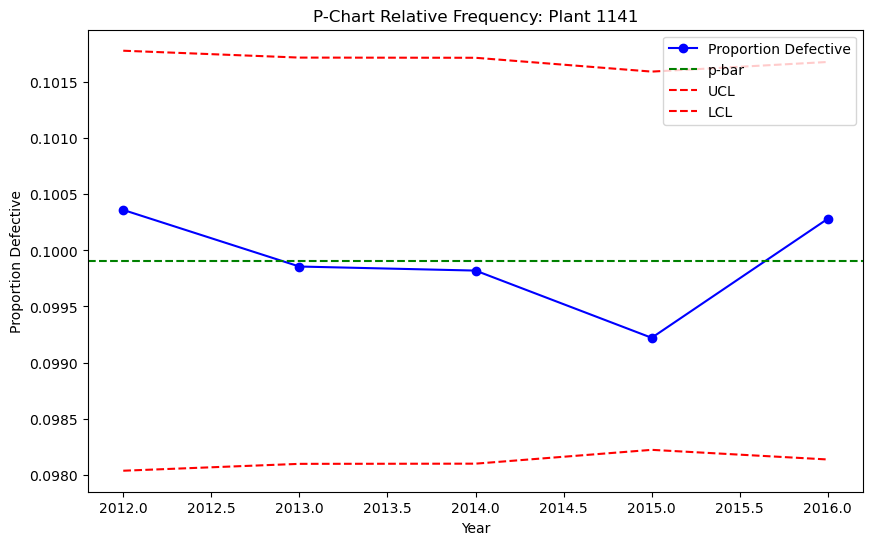

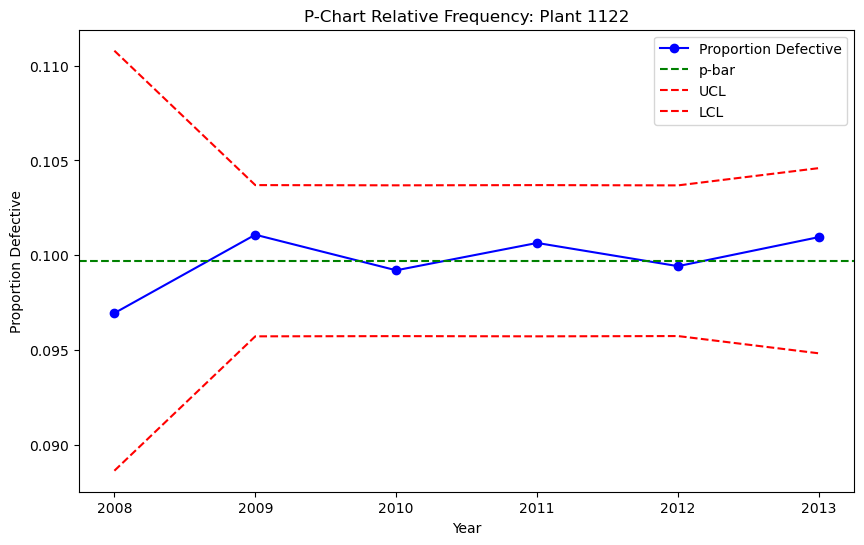

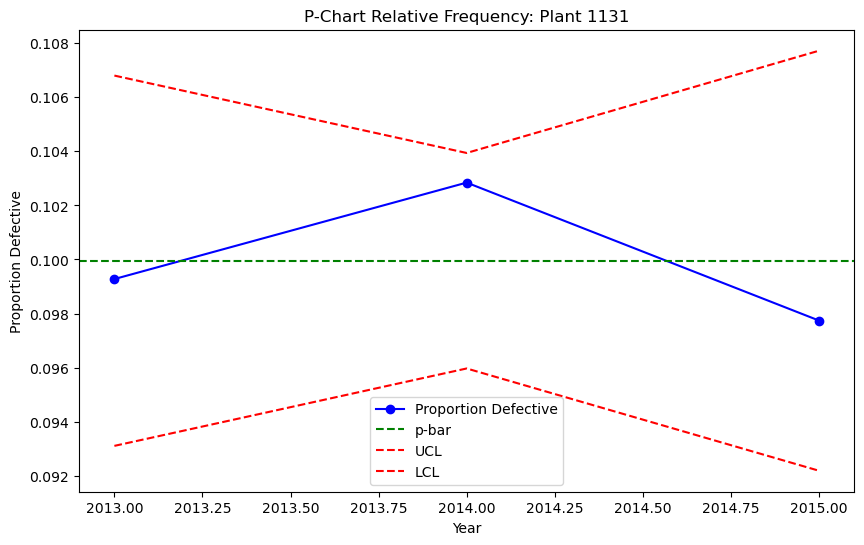

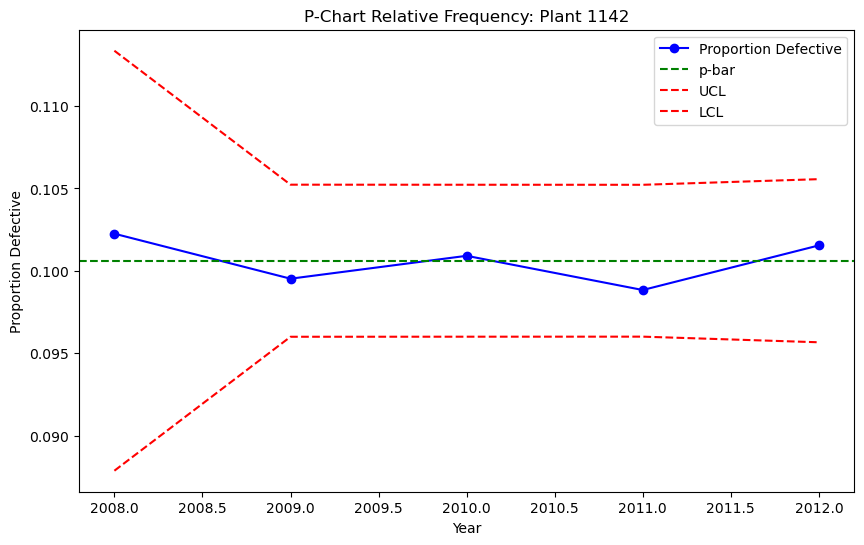

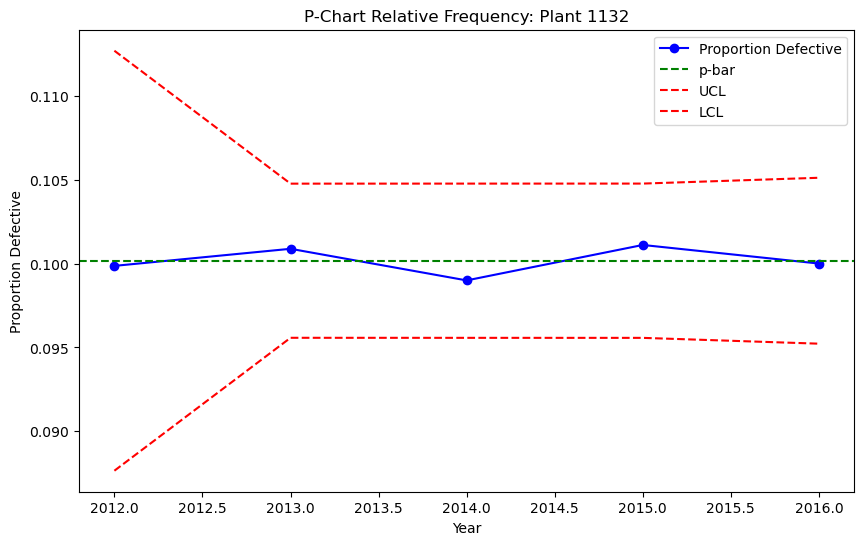

In [17]:
def plotPChart(plantNo, plantControlLimit, plantList):
    plt.figure(figsize=(10, 6))
    plt.plot(plantNo['year'], plantControlLimit['p'], marker='o', 
             linestyle='-', color='blue', label='Proportion Defective')
    plt.axhline(y=plantControlLimit['p'].mean(), 
                color='green', linestyle='--', label='p-bar')
    plt.plot(plantNo['year'], plantControlLimit['ucl'], color='red', 
             linestyle='--', label='UCL')
    plt.plot(plantNo['year'], plantControlLimit['lcl'], color='red', 
             linestyle='--', label='LCL')

    plt.title('P-Chart Relative Frequency: Plant ' + str(plantList))
    plt.xlabel('Year')
    plt.ylabel('Proportion Defective')
    plt.legend()
    plt.show()
    return

for i in range(len(plant)):
    plotPChart(plant[i], plantControlLimit[i], plantList[i])

Now, for the requirements, we sort the relative frequency of all the plants in descending order and pick the top 3. Then we check which components are produced in the particular plants. We will check for the annual top 3 plants and the plant with overall top relative frequency.

In [18]:
plantList_relFrq_sortedAnnually = []
for i in range(len(productionYear)):
    plantList_relFrq_sortedAnnually.append(plantList_relFrq[plantList_relFrq['year'] 
                                                            == productionYear[i]].sort_values('relativeFreqPercentage', 
                                                                                              ascending=False).reset_index(drop=True).head())
plantList_relFrq_sortedOverall  = plantList_relFrq.sort_values('relativeFreqPercentage', ascending=False).reset_index(drop=True)


Annual Relative Frequency Rank (2008 - 2016)

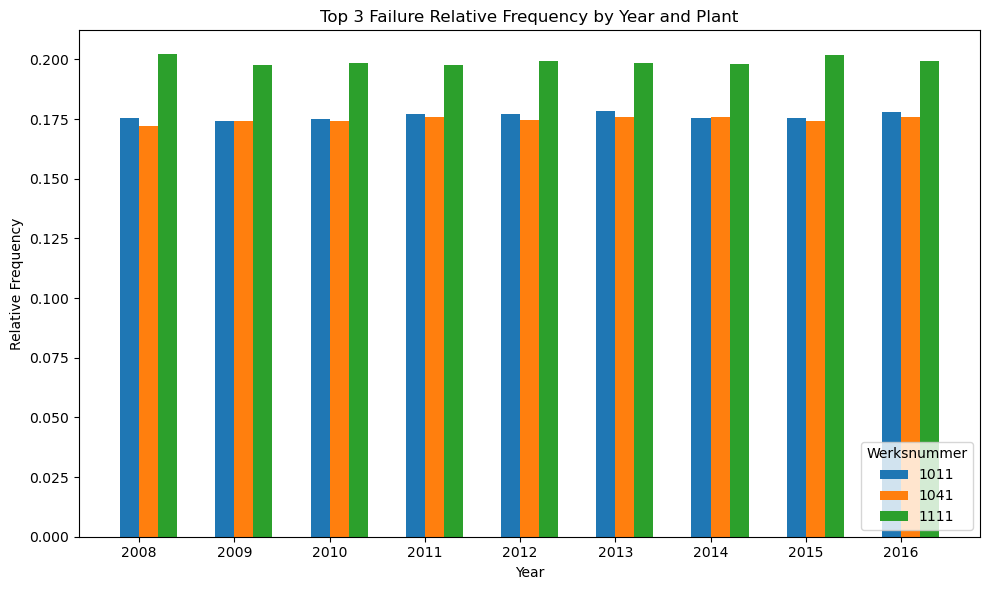

In [19]:
# create a bar chart that shows annual top 3 plants with the highest failure relative frequency

plantList_relFrqGrouped          = plantList_relFrq.loc[:,['year','werksnummer','relativeFreq']]
plantList_relFrqGroupedSorted    = plantList_relFrqGrouped.sort_values(by=['year','relativeFreq'], 
                                                  ascending=[True, False]).groupby('year')
plantList_relFrqGroupedSortedTop = plantList_relFrqGroupedSorted.head(3).reset_index(drop=True)
plantList_relFrqGroupedSortedTopPivoted = plantList_relFrqGroupedSortedTop.pivot(index='year',
                                                              columns='werksnummer', 
                                                              values='relativeFreq')
# define the bars
bar_width = 0.2
years = plantList_relFrqGroupedSortedTopPivoted.index
werksnummer = plantList_relFrqGroupedSortedTopPivoted.columns

# create bar positions
bar_pos = [np.arange(len(years)) + i * bar_width for i in range(len(werksnummer))]
# plotting each plant
plt.figure(figsize=(10,6))
for i, werksnummer in enumerate(werksnummer):
    plt.bar(bar_pos[i], plantList_relFrqGroupedSortedTopPivoted[werksnummer], 
            width=bar_width, label=werksnummer)
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.title('Top 3 Failure Relative Frequency by Year and Plant')
plt.xticks([r + bar_width / 2 for r in range(len(years))], years)
plt.legend(title='Werksnummer', loc='lower right')
plt.tight_layout()
plt.show()

Overall Relative Frequency Rank (2008 - 2016)

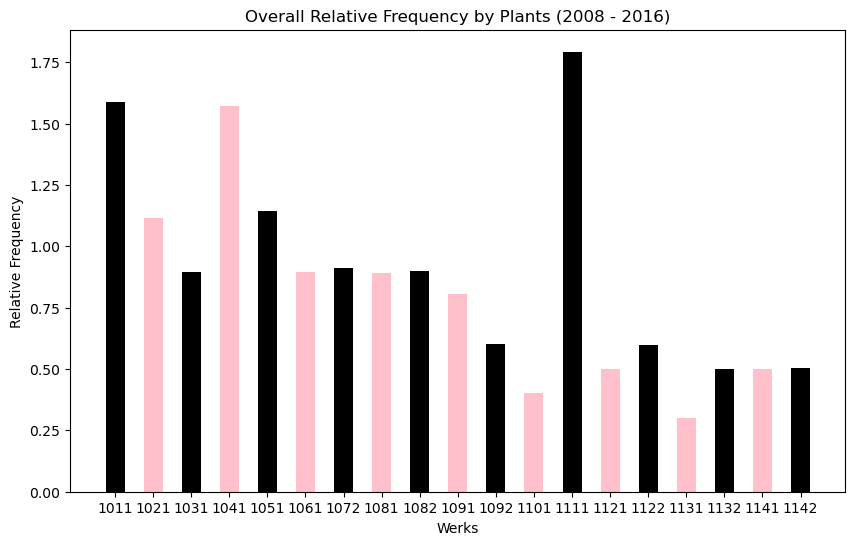

In [20]:
plantList_relFrqBar = plantList_relFrq.groupby('werksnummer')['relativeFreq'].sum().reset_index()
plantList_relFrqBar['werksnummer'] = plantList_relFrqBar['werksnummer'].astype('str')

plt.figure(figsize=(10,6))
plt.bar(plantList_relFrqBar['werksnummer'], 
        plantList_relFrqBar['relativeFreq'], width=0.5, 
        color=['black', 'pink'])
plt.xlabel('Werks')
plt.ylabel('Relative Frequency')
plt.title('Overall Relative Frequency by Plants (2008 - 2016)')
plt.show()

Create Pareto Chart to check the plants that contribute 80% of the total defective components during the
2008 - 2016 period.

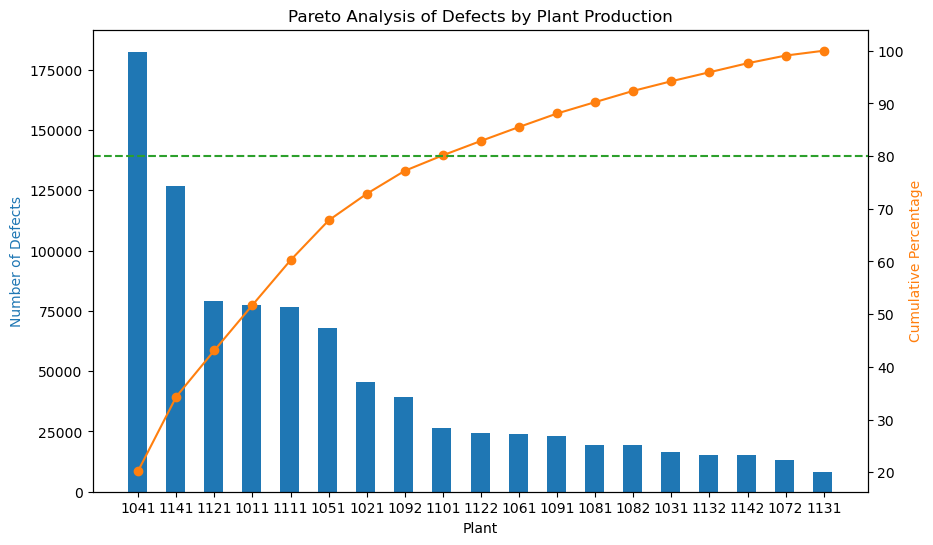

In [25]:
# using pareto analysis to find out which plants contribute most of the defective
# components

pareto = plantList_relFrq[(plantList_relFrq['totalVolume'] != 0) &
                      (plantList_relFrq['defectVolume'] != 0)].loc[:,['werksnummer',
                                                                      'defectVolume']]
pareto = pareto.groupby(
                   'werksnummer', as_index=False)['defectVolume'].sum().sort_values(
                        by='defectVolume', ascending=False).reset_index(drop=True)

pareto['cumulativeDefects']    = pareto['defectVolume'].cumsum()
pareto['cumulativePercentage'] = 100 * pareto['cumulativeDefects'] / pareto['defectVolume'].sum()

pareto['werksnummer'] = pareto['werksnummer'].astype('str')

fig, ax1 = plt.subplots(figsize=(10,6))

bar_width = 0.5  # Adjust the bar width (less than 1 for spacing)
x = range(len(pareto['werksnummer']))  # X positions of bars
bar_positions = [i - (bar_width / 20) for i in x]  # Center bars by adjusting positions

# Bar chart for defects with adjusted bar positions
ax1.bar(bar_positions, pareto['defectVolume'], width=bar_width, color='C0')

# ax1.bar(df['werksnummer'], df['defectVolume'], color='C0')
ax1.set_xlabel('Plant')
ax1.set_ylabel('Number of Defects', color='C0')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(pareto['werksnummer'], pareto['cumulativePercentage'], color='C1', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='C1')

# Adding a horizontal line for the 80% mark
ax2.axhline(80, color='C2', linestyle='--')

plt.title('Pareto Analysis of Defects by Plant Production')
plt.show()


In [50]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Example data: Failure status, failure date, and failure mileage
# data = {
#     'Component': ['Body', 'Engine', 'Seats', 'Electronics', 'Suspension'],
#     'Failure Status': [1, 1, 0, 1, 0],  # 1=Failure, 0=Censored
#     'Failure Mileage': [120000, 150000, None, 90000, None]  # None represents censored data
# }
# df = pd.DataFrame(data)

# # Create Kaplan-Meier estimator
# kmf = KaplanMeierFitter()
# df

motorList_all[motorList_all['Herstellernummer']]

,ID,Produktionsdatum,Herstellernummer,Werksnummer,Fehlerhaft,Fehlerhaft_Datum,Fehlerhaft_Fahrleistung
0,K1BE1-101-1011-7,2008-11-12,101,1011,0,NaT,0
1,K1BE1-101-1011-12,2008-11-13,101,1011,0,NaT,0
2,K1BE1-101-1011-90,2008-11-13,101,1011,0,NaT,0
3,K1BE1-101-1011-2,2008-11-12,101,1011,0,NaT,0
4,K1BE1-101-1011-8,2008-11-13,101,1011,0,NaT,0
...,...,...,...,...,...,...,...
407521,K1BE2-101-1011-81494,2016-10-05,101,1011,1,2017-03-06,6727
407522,K1BE2-101-1011-81590,2016-10-05,101,1011,1,2017-03-06,6727
407523,K1BE2-101-1011-81686,2016-10-05,101,1011,0,NaT,0
407524,K1BE2-101-1011-81782,2016-10-05,101,1011,0,NaT,0


ValueError: Values must be numeric: no strings, datetimes, objects, etc.

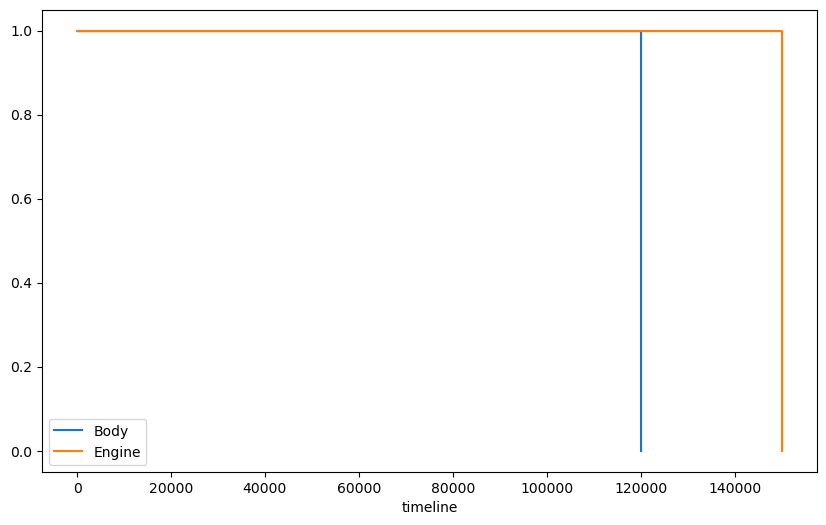

In [30]:
# Fit model and plot survival functions
plt.figure(figsize=(10, 6))

for component in df['Component'].unique():
    component_data = df[df['Component'] == component]
    kmf.fit(durations=component_data['Failure Mileage'].dropna(), event_observed=component_data['Failure Status'].dropna())
    kmf.plot(label=component)

plt.title('Kaplan-Meier Survival Curves for Components')
plt.xlabel('Mileage')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()
